In [1]:
import pandas as pd
import graphlab as gl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_data():
    # Load training ratings for users and jokes
    sf = gl.SFrame('data/ratings.dat', format='tsv')

    # Load sample submission to test predictions against
    df_sample = pd.read_csv('data/sample_submission.csv')
    sf_sample = gl.SFrame(df_sample)

    return sf, sf_sample, df_sample

def score(df_true, df_predict):
    """Look at 5% of most highly predicted jokes for each user.
    Return the average actual rating of those jokes.
    """
    #sample = pd.read_csv('data/sample_submission.csv')

    df = pd.concat([#sample,
                    df_predict,
                    df_true], axis=1)


    g = df.groupby('user_id')

    top_5 = g.pred_rating.apply(
        lambda x: x >= x.quantile(.95)
    )

    return df_true[top_5==1].mean()['true_rating']

def create_recommender(sf, similarity_type='jaccard', threshold=.001, only_top_k=64):
    m = gl.recommender.item_similarity_recommender.create(observation_data=sf,
                                                        user_id='user_id', item_id='joke_id',
                                                        target='rating',
                                                        similarity_type=similarity_type,
                                                        threshold=threshold,
                                                        only_top_k=only_top_k)
    return m

In [3]:
sf, sf_sample, df_sample = load_data()

train_data, val_data = gl.recommender.util.random_split_by_user(sf, 'user_id', 'joke_id')

df_true= pd.DataFrame()
df_predict = pd.DataFrame()

df_true['user_id'] = val_data['user_id']
df_true['joke_id'] = val_data['joke_id']
df_true['true_rating'] = val_data['rating']

This non-commercial license of GraphLab Create for academic use is assigned to tyler.n.watson@gmail.com and will expire on December 15, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1513633015.log


Finished parsing file /Users/gstudent/Desktop/Recommender-System-Case-Study/data/ratings.dat

Parsing completed. Parsed 100 lines in 0.699809 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/gstudent/Desktop/Recommender-System-Case-Study/data/ratings.dat

Parsing completed. Parsed 1218325 lines in 0.919452 secs.

In [4]:
def create_factorization_recommender(sf, num_factors=32):
    m = gl.recommender.ranking_factorization_recommender.create(observation_data=sf,
                                                        user_id='user_id', item_id='joke_id',
                                                        target='rating',
                                                        num_factors=num_factors)
    return m

# The block below this takes forever to run!

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.47752s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 0        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (80.806 >= 54.6891)          |

| 1       | 6.25              | No Decrease (78.1542 >= 54.6891)         |

| 2       | 1.5625            | No Decrease (93.223 >= 54.6891)          |

| 3       | 0.390625          | 53.7248                                  |

| 4       | 0.195312          | 48.9503                                  |

| 5       | 0.0976562         | 45.339                                   |

| 6       | 0.0488281         | 42.332                                   |

| 7       | 0.0244141         | 44.0073                                  |

| 8       | 0.012207          | 44.3236                                  |

| 9       | 0.00610352        | 46.0177                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0488281         | 42.332                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 116us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 728.546ms    | 40.9121           | 5.02828               | 0.0488281   |

| 2       | 1.39s        | 39.0311           | 4.78776               | 0.0290334   |

| 3       | 2.05s        | 38.2786           | 4.72892               | 0.0214205   |

| 4       | 2.71s        | 38.1331           | 4.70402               | 0.0172633   |

| 5       | 3.38s        | 37.9278           | 4.68542               | 0.014603    |

| 6       | 4.02s        | 37.8995           | 4.67813               | 0.0127367   |

| 10      | 6.49s        | 37.7307           | 4.65322               | 0.008683    |

| 11      | 7.16s        | 37.6091           | 4.64389               | 0.00679779  |

| 15      | 9.88s        | 37.5531           | 4.6293                | 0.00380916  |

| 20      | 13.09s       | 37.5087           | 4.6168                | 0.00129074  |

| 25      | 16.30s       | 37.6192           | 4.61782               | 0.000459058 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 44.4158

Final training RMSE: 4.63317

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 0, 'Score: ', 2.3078327922077921)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.5219s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 1        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (104.983 >= 54.7174)         |

| 1       | 6.25              | No Decrease (92.4953 >= 54.7174)         |

| 2       | 1.5625            | No Decrease (91.9583 >= 54.7174)         |

| 3       | 0.390625          | No Decrease (63.8579 >= 54.7174)         |

| 4       | 0.0976562         | 46.6814                                  |

| 5       | 0.0488281         | 43.6341                                  |

| 6       | 0.0244141         | 40.937                                   |

| 7       | 0.012207          | 42.4224                                  |

| 8       | 0.00610352        | 46.1151                                  |

| 9       | 0.00305176        | 47.3055                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 40.937                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 114us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.01s        | 40.6608           | 5.01015               | 0.0244141   |

| 2       | 1.97s        | 37.6105           | 4.69819               | 0.0145167   |

| 3       | 2.96s        | 36.4924           | 4.60761               | 0.0107102   |

| 4       | 3.91s        | 36.1003           | 4.5666                | 0.00863167  |

| 5       | 4.88s        | 35.8573           | 4.53679               | 0.00730151  |

| 6       | 5.83s        | 35.7321           | 4.52346               | 0.00636835  |

| 10      | 9.73s        | 35.239            | 4.4854                | 0.0043415   |

| 11      | 10.68s       | 35.1951           | 4.47961               | 0.00404199  |

| 15      | 14.51s       | 35.0033           | 4.45864               | 0.00320311  |

| 20      | 19.37s       | 34.75             | 4.43547               | 0.00182538  |

| 25      | 24.38s       | 34.632            | 4.4203                | 0.000918116 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 41.5143

Final training RMSE: 4.43498

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 1, 'Score: ', 1.9770021645021645)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.53715s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 2        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (123.034 >= 54.717)          |

| 1       | 6.25              | No Decrease (121 >= 54.717)              |

| 2       | 1.5625            | No Decrease (110.228 >= 54.717)          |

| 3       | 0.390625          | No Decrease (75.2812 >= 54.717)          |

| 4       | 0.0976562         | 49.7401                                  |

| 5       | 0.0488281         | 46.7609                                  |

| 6       | 0.0244141         | 37.2697                                  |

| 7       | 0.012207          | 38.9768                                  |

| 8       | 0.00610352        | 46.1348                                  |

| 9       | 0.00305176        | 47.3374                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 37.2697                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 115us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.05s        | 41.0324           | 5.03655               | 0.0244141   |

| 2       | 2.06s        | 37.3386           | 4.69744               | 0.0145167   |

| 3       | 3.15s        | 36.0549           | 4.57873               | 0.0107102   |

| 4       | 4.15s        | 35.3441           | 4.51447               | 0.00863167  |

| 5       | 5.20s        | 34.9108           | 4.47259               | 0.00730151  |

| 6       | 6.28s        | 34.6715           | 4.4474                | 0.00636835  |

| 7       | 7.30s        | 34.4395           | 4.42581               | 0.00567305  |

| 8       | 8.34s        | 34.2831           | 4.41402               | 0.00513242  |

| 9       | 9.37s        | 34.143            | 4.39943               | 0.00469849  |

| 10      | 10.45s       | 34.0562           | 4.39235               | 0.0043415   |

| 11      | 11.46s       | 33.9718           | 4.38351               | 0.00404199  |

| 12      | 12.44s       | 33.8495           | 4.37149               | 0.00378664  |

| 13      | 13.43s       | 33.8235           | 4.36941               | 0.00356601  |

| 14      | 14.41s       | 33.7647           | 4.36525               | 0.00337322  |

| 15      | 15.40s       | 33.7094           | 4.35711               | 0.00320311  |

| 16      | 16.37s       | 33.6722           | 4.35329               | 0.00305176  |

| 17      | 17.36s       | 33.6001           | 4.35037               | 0.00291611  |

| 18      | 18.34s       | 33.5873           | 4.34437               | 0.00279374  |

| 19      | 19.32s       | 33.5551           | 4.34316               | 0.00268272  |

| 20      | 20.32s       | 33.4968           | 4.33803               | 0.00258147  |

| 21      | 21.30s       | 33.5102           | 4.33837               | 0.00248872  |

| 22      | 22.32s       | 33.3746           | 4.32533               | 0.002021    |

| 23      | 23.32s       | 33.3181           | 4.31852               | 0.00164373  |

| 24      | 24.34s       | 33.2602           | 4.31166               | 0.00133878  |

| 25      | 25.40s       | 33.2348           | 4.30907               | 0.00129841  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 40.3604

Final training RMSE: 4.31944

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 2, 'Score: ', 1.8969155844155845)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.64056s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 3        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (151.669 >= 54.7442)         |

| 1       | 6.25              | No Decrease (148.195 >= 54.7442)         |

| 2       | 1.5625            | No Decrease (126.817 >= 54.7442)         |

| 3       | 0.390625          | No Decrease (82.431 >= 54.7442)          |

| 4       | 0.0976562         | No Decrease (56.7461 >= 54.7442)         |

| 5       | 0.0244141         | 36.1303                                  |

| 6       | 0.012207          | 38.241                                   |

| 7       | 0.00610352        | 46.3247                                  |

| 8       | 0.00305176        | 47.5006                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 36.1303                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 103us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.11s        | 40.902            | 5.05867               | 0.0244141   |

| 2       | 2.16s        | 37.2327           | 4.69463               | 0.0145167   |

| 3       | 3.25s        | 35.6725           | 4.54963               | 0.0107102   |

| 4       | 4.32s        | 34.7681           | 4.47114               | 0.00863167  |

| 5       | 5.37s        | 34.198            | 4.42224               | 0.00730151  |

| 6       | 6.41s        | 33.7938           | 4.38842               | 0.00636835  |

| 7       | 7.45s        | 33.4938           | 4.3636                | 0.00567305  |

| 8       | 8.52s        | 33.2496           | 4.34515               | 0.00513242  |

| 9       | 9.57s        | 33.0858           | 4.33097               | 0.00469849  |

| 10      | 10.63s       | 32.9577           | 4.31964               | 0.0043415   |

| 11      | 11.68s       | 32.8244           | 4.30874               | 0.00404199  |

| 12      | 12.76s       | 32.6904           | 4.29472               | 0.00378664  |

| 13      | 13.90s       | 32.6246           | 4.29312               | 0.00356601  |

| 14      | 15.03s       | 32.5258           | 4.28297               | 0.00337322  |

| 15      | 16.18s       | 32.4517           | 4.27745               | 0.00320311  |

| 16      | 17.29s       | 32.4037           | 4.27455               | 0.00305176  |

| 17      | 18.65s       | 32.3242           | 4.26521               | 0.00291611  |

| 18      | 19.85s       | 32.2463           | 4.26032               | 0.00279374  |

| 19      | 20.92s       | 32.2076           | 4.25807               | 0.00268272  |

| 20      | 21.97s       | 32.1724           | 4.25265               | 0.00258147  |

| 21      | 23.05s       | 32.1456           | 4.25018               | 0.00248872  |

| 22      | 24.08s       | 32.0895           | 4.24796               | 0.00240338  |

| 23      | 25.14s       | 32.0522           | 4.24121               | 0.00232458  |

| 24      | 26.19s       | 32.0365           | 4.24434               | 0.00225155  |

| 25      | 27.24s       | 32.0151           | 4.24066               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 39.1472

Final training RMSE: 4.19808

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 3, 'Score: ', 2.1828327922077921)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.64025s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 4        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (181.844 >= 54.7121)         |

| 1       | 6.25              | No Decrease (165.993 >= 54.7121)         |

| 2       | 1.5625            | No Decrease (151.156 >= 54.7121)         |

| 3       | 0.390625          | No Decrease (96.2867 >= 54.7121)         |

| 4       | 0.0976562         | No Decrease (55.9374 >= 54.7121)         |

| 5       | 0.0244141         | 35.4204                                  |

| 6       | 0.012207          | 37.8216                                  |

| 7       | 0.00610352        | 46.1217                                  |

| 8       | 0.00305176        | 47.4427                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 35.4204                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 112us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.04s        | 41.2269           | 5.08456               | 0.0244141   |

| 2       | 2.05s        | 37.1807           | 4.70327               | 0.0145167   |

| 3       | 3.09s        | 35.4735           | 4.5457                | 0.0107102   |

| 4       | 4.10s        | 34.55             | 4.45526               | 0.00863167  |

| 5       | 5.10s        | 33.7935           | 4.39147               | 0.00730151  |

| 6       | 6.10s        | 33.4652           | 4.36386               | 0.00636835  |

| 7       | 7.11s        | 33.0419           | 4.32758               | 0.00567305  |

| 8       | 8.14s        | 32.7812           | 4.3074                | 0.00513242  |

| 9       | 9.13s        | 32.505            | 4.28299               | 0.00469849  |

| 10      | 10.12s       | 32.2467           | 4.25914               | 0.0043415   |

| 11      | 11.13s       | 32.093            | 4.24674               | 0.00404199  |

| 12      | 12.09s       | 31.958            | 4.23412               | 0.00378664  |

| 13      | 13.09s       | 31.8482           | 4.22881               | 0.00356601  |

| 14      | 14.05s       | 31.7062           | 4.2142                | 0.00337322  |

| 15      | 15.02s       | 31.6196           | 4.20598               | 0.00320311  |

| 16      | 16.03s       | 31.5405           | 4.20029               | 0.00305176  |

| 17      | 17.04s       | 31.4569           | 4.19169               | 0.00291611  |

| 18      | 18.03s       | 31.3659           | 4.18581               | 0.00279374  |

| 19      | 19.04s       | 31.3128           | 4.18321               | 0.00268272  |

| 20      | 20.02s       | 31.2658           | 4.17554               | 0.00258147  |

| 21      | 21.01s       | 31.2234           | 4.17113               | 0.00248872  |

| 22      | 22.02s       | 31.1434           | 4.16864               | 0.00240338  |

| 23      | 23.02s       | 31.114            | 4.16179               | 0.00232458  |

| 24      | 24.01s       | 31.0477           | 4.15856               | 0.00225155  |

| 25      | 24.99s       | 31.0256           | 4.15586               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 38.26

Final training RMSE: 4.09707

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 4, 'Score: ', 2.1713338744588744)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.63968s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 5        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (229.876 >= 54.7397)         |

| 1       | 6.25              | No Decrease (236.587 >= 54.7397)         |

| 2       | 1.5625            | No Decrease (179.266 >= 54.7397)         |

| 3       | 0.390625          | No Decrease (114.339 >= 54.7397)         |

| 4       | 0.0976562         | No Decrease (58.4674 >= 54.7397)         |

| 5       | 0.0244141         | 33.361                                   |

| 6       | 0.012207          | 37.1243                                  |

| 7       | 0.00610352        | 46.1535                                  |

| 8       | 0.00305176        | 47.3807                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 33.361                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 115us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.13s        | 41.6835           | 5.11855               | 0.0244141   |

| 2       | 2.37s        | 37.3851           | 4.72081               | 0.0145167   |

| 3       | 3.43s        | 35.4491           | 4.54619               | 0.0107102   |

| 4       | 4.54s        | 34.3419           | 4.44134               | 0.00863167  |

| 5       | 5.58s        | 33.5224           | 4.37105               | 0.00730151  |

| 6       | 6.63s        | 33.0765           | 4.33717               | 0.00636835  |

| 7       | 7.67s        | 32.5041           | 4.28559               | 0.00567305  |

| 8       | 8.74s        | 32.1727           | 4.26144               | 0.00513242  |

| 9       | 9.80s        | 31.8882           | 4.2408                | 0.00469849  |

| 10      | 10.84s       | 31.624            | 4.21429               | 0.0043415   |

| 11      | 11.88s       | 31.4426           | 4.20136               | 0.00404199  |

| 12      | 12.93s       | 31.2798           | 4.18588               | 0.00378664  |

| 13      | 13.98s       | 31.0718           | 4.17169               | 0.00356601  |

| 14      | 15.11s       | 30.9697           | 4.16252               | 0.00337322  |

| 15      | 16.22s       | 30.8403           | 4.14961               | 0.00320311  |

| 16      | 17.26s       | 30.7515           | 4.14445               | 0.00305176  |

| 17      | 18.38s       | 30.6761           | 4.13602               | 0.00291611  |

| 18      | 19.45s       | 30.563            | 4.12579               | 0.00279374  |

| 19      | 20.53s       | 30.5015           | 4.1235                | 0.00268272  |

| 20      | 21.59s       | 30.4599           | 4.11708               | 0.00258147  |

| 21      | 22.63s       | 30.3693           | 4.10761               | 0.00248872  |

| 22      | 23.65s       | 30.3235           | 4.10894               | 0.00240338  |

| 23      | 24.68s       | 30.2738           | 4.10046               | 0.00232458  |

| 24      | 25.72s       | 30.236            | 4.10091               | 0.00225155  |

| 25      | 26.77s       | 30.1674           | 4.0916                | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 37.5215

Final training RMSE: 4.03055

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 5, 'Score: ', 2.1541869588744587)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.5388s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 6        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (291.617 >= 54.6565)         |

| 1       | 6.25              | No Decrease (259.014 >= 54.6565)         |

| 2       | 1.5625            | No Decrease (231.898 >= 54.6565)         |

| 3       | 0.390625          | No Decrease (128.706 >= 54.6565)         |

| 4       | 0.0976562         | No Decrease (59.2442 >= 54.6565)         |

| 5       | 0.0244141         | 32.5628                                  |

| 6       | 0.012207          | 37.8864                                  |

| 7       | 0.00610352        | 46.1478                                  |

| 8       | 0.00305176        | 47.3476                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 32.5628                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 114us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.09s        | 42.134            | 5.15232               | 0.0244141   |

| 2       | 2.09s        | 37.4694           | 4.73492               | 0.0145167   |

| 3       | 3.11s        | 35.3893           | 4.54967               | 0.0107102   |

| 4       | 4.22s        | 34.1865           | 4.43471               | 0.00863167  |

| 5       | 5.29s        | 33.4341           | 4.36575               | 0.00730151  |

| 6       | 6.37s        | 32.7592           | 4.30604               | 0.00636835  |

| 7       | 7.53s        | 32.301            | 4.26546               | 0.00567305  |

| 8       | 8.68s        | 31.924            | 4.23682               | 0.00513242  |

| 9       | 9.87s        | 31.5822           | 4.20474               | 0.00469849  |

| 10      | 10.95s       | 31.2736           | 4.1776                | 0.0043415   |

| 11      | 12.05s       | 31.0172           | 4.15667               | 0.00404199  |

| 12      | 13.12s       | 30.8622           | 4.14286               | 0.00378664  |

| 13      | 14.24s       | 30.6862           | 4.13123               | 0.00356601  |

| 14      | 15.31s       | 30.533            | 4.11552               | 0.00337322  |

| 15      | 16.40s       | 30.3345           | 4.09853               | 0.00320311  |

| 16      | 17.51s       | 30.2679           | 4.0963                | 0.00305176  |

| 17      | 18.59s       | 30.1296           | 4.08158               | 0.00291611  |

| 18      | 19.73s       | 30.012            | 4.07354               | 0.00279374  |

| 19      | 20.81s       | 29.9807           | 4.07314               | 0.00268272  |

| 20      | 21.85s       | 29.8703           | 4.06068               | 0.00258147  |

| 21      | 22.94s       | 29.7802           | 4.05109               | 0.00248872  |

| 22      | 24.07s       | 29.7029           | 4.0494                | 0.00240338  |

| 23      | 25.10s       | 29.6234           | 4.03788               | 0.00232458  |

| 24      | 26.13s       | 29.6017           | 4.04053               | 0.00225155  |

| 25      | 27.24s       | 29.5071           | 4.02942               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 37.0554

Final training RMSE: 3.97729

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 6, 'Score: ', 2.1613568722943723)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.58357s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 7        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (355.604 >= 54.7657)         |

| 1       | 6.25              | No Decrease (342.744 >= 54.7657)         |

| 2       | 1.5625            | No Decrease (284.103 >= 54.7657)         |

| 3       | 0.390625          | No Decrease (154.882 >= 54.7657)         |

| 4       | 0.0976562         | No Decrease (60.3625 >= 54.7657)         |

| 5       | 0.0244141         | 31.2383                                  |

| 6       | 0.012207          | 37.1625                                  |

| 7       | 0.00610352        | 46.2415                                  |

| 8       | 0.00305176        | 47.4179                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 31.2383                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 125us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.15s        | 42.6311           | 5.18494               | 0.0244141   |

| 2       | 2.34s        | 37.6208           | 4.75953               | 0.0145167   |

| 3       | 3.54s        | 35.4705           | 4.56051               | 0.0107102   |

| 4       | 4.68s        | 34.1211           | 4.42992               | 0.00863167  |

| 5       | 5.79s        | 33.1997           | 4.3473                | 0.00730151  |

| 6       | 6.86s        | 32.501            | 4.28613               | 0.00636835  |

| 7       | 7.92s        | 31.916            | 4.23353               | 0.00567305  |

| 8       | 9.01s        | 31.3638           | 4.18663               | 0.00513242  |

| 9       | 10.09s       | 31.0572           | 4.16234               | 0.00469849  |

| 10      | 11.19s       | 30.6827           | 4.12623               | 0.0043415   |

| 11      | 12.25s       | 30.3312           | 4.0946                | 0.00404199  |

| 12      | 13.34s       | 30.143            | 4.07803               | 0.00378664  |

| 13      | 14.44s       | 29.9441           | 4.06443               | 0.00356601  |

| 14      | 15.51s       | 29.7705           | 4.04672               | 0.00337322  |

| 15      | 16.59s       | 29.5943           | 4.03148               | 0.00320311  |

| 16      | 17.66s       | 29.4474           | 4.01937               | 0.00305176  |

| 17      | 18.76s       | 29.3509           | 4.01014               | 0.00291611  |

| 18      | 19.84s       | 29.1598           | 3.99262               | 0.00279374  |

| 19      | 20.92s       | 29.1072           | 3.99172               | 0.00268272  |

| 20      | 22.02s       | 29.0131           | 3.97814               | 0.00258147  |

| 21      | 23.11s       | 28.9416           | 3.97336               | 0.00248872  |

| 22      | 24.20s       | 28.8889           | 3.97331               | 0.00240338  |

| 23      | 25.63s       | 28.7672           | 3.95733               | 0.00232458  |

| 24      | 26.79s       | 28.7101           | 3.95364               | 0.00225155  |

| 25      | 27.89s       | 28.6229           | 3.94539               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 36.2255

Final training RMSE: 3.87476

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 7, 'Score: ', 2.2842600108225106)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.54452s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (407.59 >= 54.7239)          |

| 1       | 6.25              | No Decrease (409.221 >= 54.7239)         |

| 2       | 1.5625            | No Decrease (344.531 >= 54.7239)         |

| 3       | 0.390625          | No Decrease (189.056 >= 54.7239)         |

| 4       | 0.0976562         | No Decrease (66.4092 >= 54.7239)         |

| 5       | 0.0244141         | 30.1366                                  |

| 6       | 0.012207          | 37.9338                                  |

| 7       | 0.00610352        | 46.2441                                  |

| 8       | 0.00305176        | 47.3861                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 30.1366                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 114us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 738.641ms    | 42.9138           | 5.2186                | 0.0244141   |

| 2       | 1.43s        | 37.4934           | 4.75969               | 0.0145167   |

| 3       | 2.12s        | 35.175            | 4.54841               | 0.0107102   |

| 4       | 2.81s        | 33.9628           | 4.42938               | 0.00863167  |

| 5       | 3.50s        | 33.0651           | 4.34659               | 0.00730151  |

| 6       | 4.21s        | 32.618            | 4.30083               | 0.00636835  |

| 10      | 7.00s        | 31.023            | 4.14762               | 0.0043415   |

| 11      | 7.70s        | 30.5329           | 4.1061                | 0.00404199  |

| 15      | 10.45s       | 29.4596           | 4.01551               | 0.00320311  |

| 20      | 13.88s       | 28.6748           | 3.95117               | 0.00258147  |

| 25      | 17.32s       | 28.2074           | 3.91486               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 36.1566

Final training RMSE: 3.87412

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 8, 'Score: ', 2.1714015151515151)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.49033s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 9        |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (604.76 >= 54.7049)          |

| 1       | 6.25              | No Decrease (529.528 >= 54.7049)         |

| 2       | 1.5625            | No Decrease (449.286 >= 54.7049)         |

| 3       | 0.390625          | No Decrease (219.201 >= 54.7049)         |

| 4       | 0.0976562         | No Decrease (65.5671 >= 54.7049)         |

| 5       | 0.0244141         | 29.2098                                  |

| 6       | 0.012207          | 37.0884                                  |

| 7       | 0.00610352        | 46.1499                                  |

| 8       | 0.00305176        | 47.3934                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 29.2098                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 118us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.08s        | 43.5687           | 5.25844               | 0.0244141   |

| 2       | 2.10s        | 38.1211           | 4.80231               | 0.0145167   |

| 3       | 3.13s        | 35.4229           | 4.56102               | 0.0107102   |

| 4       | 4.18s        | 34.0568           | 4.42899               | 0.00863167  |

| 5       | 5.21s        | 32.9651           | 4.33075               | 0.00730151  |

| 6       | 6.23s        | 32.3404           | 4.27593               | 0.00636835  |

| 7       | 7.26s        | 31.5985           | 4.20391               | 0.00567305  |

| 8       | 8.31s        | 30.8995           | 4.14539               | 0.00513242  |

| 9       | 9.33s        | 30.5682           | 4.12121               | 0.00469849  |

| 10      | 10.37s       | 30.0482           | 4.06974               | 0.0043415   |

| 11      | 11.38s       | 29.6038           | 4.03307               | 0.00404199  |

| 12      | 12.39s       | 29.3023           | 4.00527               | 0.00378664  |

| 13      | 13.44s       | 29.0641           | 3.99061               | 0.00356601  |

| 14      | 14.46s       | 28.7301           | 3.95707               | 0.00337322  |

| 15      | 15.50s       | 28.5578           | 3.94339               | 0.00320311  |

| 16      | 16.55s       | 28.4288           | 3.93508               | 0.00305176  |

| 17      | 17.58s       | 28.2563           | 3.91807               | 0.00291611  |

| 18      | 18.59s       | 28.002            | 3.89377               | 0.00279374  |

| 19      | 19.60s       | 27.897            | 3.8864                | 0.00268272  |

| 20      | 20.62s       | 27.8028           | 3.87543               | 0.00258147  |

| 21      | 21.65s       | 27.7005           | 3.86643               | 0.00248872  |

| 22      | 22.68s       | 27.6378           | 3.86516               | 0.00240338  |

| 23      | 23.70s       | 27.525            | 3.85018               | 0.00232458  |

| 24      | 24.72s       | 27.4724           | 3.84944               | 0.00225155  |

| 25      | 25.76s       | 27.3706           | 3.83734               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 35.1198

Final training RMSE: 3.78187

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 9, 'Score: ', 2.2385010822510822)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.50266s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 10       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | No Decrease (565.399 >= 54.7464)         |

| 3       | 0.390625          | No Decrease (281.303 >= 54.7464)         |

| 4       | 0.0976562         | No Decrease (71.0803 >= 54.7464)         |

| 5       | 0.0244141         | 28.6064                                  |

| 6       | 0.012207          | 36.8616                                  |

| 7       | 0.00610352        | 46.0061                                  |

| 8       | 0.00305176        | 47.4062                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 28.6064                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 88us         | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.04s        | 44.0314           | 5.29766               | 0.0244141   |

| 2       | 2.09s        | 38.3844           | 4.82609               | 0.0145167   |

| 3       | 3.18s        | 35.6491           | 4.58496               | 0.0107102   |

| 4       | 4.23s        | 34.0893           | 4.43879               | 0.00863167  |

| 5       | 5.27s        | 32.9029           | 4.32302               | 0.00730151  |

| 6       | 6.32s        | 32.1249           | 4.25915               | 0.00636835  |

| 7       | 7.35s        | 31.3545           | 4.18579               | 0.00567305  |

| 8       | 8.38s        | 30.6455           | 4.12221               | 0.00513242  |

| 9       | 9.43s        | 29.9553           | 4.06541               | 0.00469849  |

| 10      | 10.48s       | 29.481            | 4.02607               | 0.0043415   |

| 11      | 11.53s       | 29.0889           | 3.99105               | 0.00404199  |

| 12      | 12.56s       | 28.6814           | 3.95816               | 0.00378664  |

| 13      | 13.60s       | 28.3371           | 3.92545               | 0.00356601  |

| 14      | 14.62s       | 28.1651           | 3.91817               | 0.00337322  |

| 15      | 15.69s       | 27.9543           | 3.89661               | 0.00320311  |

| 16      | 16.87s       | 27.7711           | 3.88076               | 0.00305176  |

| 17      | 17.91s       | 27.5524           | 3.86217               | 0.00291611  |

| 18      | 18.93s       | 27.407            | 3.84759               | 0.00279374  |

| 19      | 19.99s       | 27.2113           | 3.83039               | 0.00268272  |

| 20      | 21.01s       | 27.1353           | 3.82704               | 0.00258147  |

| 21      | 22.06s       | 27.015            | 3.81288               | 0.00248872  |

| 22      | 23.09s       | 26.8869           | 3.80019               | 0.00240338  |

| 23      | 24.15s       | 26.8336           | 3.79915               | 0.00232458  |

| 24      | 25.17s       | 26.7195           | 3.78284               | 0.00225155  |

| 25      | 26.32s       | 26.6467           | 3.77969               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 34.4748

Final training RMSE: 3.68755

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 10, 'Score: ', 2.0700757575757578)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.68044s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 11       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | No Decrease (342.16 >= 54.8345)          |

| 4       | 0.0976562         | No Decrease (75.8464 >= 54.8345)         |

| 5       | 0.0244141         | 27.3721                                  |

| 6       | 0.012207          | 37.9858                                  |

| 7       | 0.00610352        | 46.2136                                  |

| 8       | 0.00305176        | 47.4292                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 27.3721                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 115us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.16s        | 44.6801           | 5.34173               | 0.0244141   |

| 2       | 2.43s        | 38.6963           | 4.85583               | 0.0145167   |

| 3       | 3.58s        | 35.6518           | 4.58167               | 0.0107102   |

| 4       | 4.67s        | 33.9412           | 4.42301               | 0.00863167  |

| 5       | 5.81s        | 32.815            | 4.32099               | 0.00730151  |

| 6       | 6.89s        | 31.8351           | 4.23704               | 0.00636835  |

| 7       | 8.00s        | 30.9435           | 4.15256               | 0.00567305  |

| 8       | 9.10s        | 30.3177           | 4.09917               | 0.00513242  |

| 9       | 10.20s       | 29.6744           | 4.04663               | 0.00469849  |

| 10      | 11.34s       | 29.0348           | 3.98711               | 0.0043415   |

| 11      | 12.43s       | 28.5555           | 3.94904               | 0.00404199  |

| 12      | 13.54s       | 28.3136           | 3.92979               | 0.00378664  |

| 13      | 14.60s       | 27.8721           | 3.88993               | 0.00356601  |

| 14      | 15.70s       | 27.6561           | 3.87345               | 0.00337322  |

| 15      | 16.84s       | 27.401            | 3.85174               | 0.00320311  |

| 16      | 18.02s       | 27.161            | 3.82557               | 0.00305176  |

| 17      | 19.17s       | 26.9945           | 3.81198               | 0.00291611  |

| 18      | 20.35s       | 26.813            | 3.79319               | 0.00279374  |

| 19      | 21.48s       | 26.7335           | 3.79091               | 0.00268272  |

| 20      | 22.71s       | 26.5353           | 3.76818               | 0.00258147  |

| 21      | 23.92s       | 26.4834           | 3.76444               | 0.00248872  |

| 22      | 25.10s       | 26.3192           | 3.74854               | 0.00240338  |

| 23      | 26.32s       | 26.2478           | 3.74026               | 0.00232458  |

| 24      | 27.58s       | 26.1415           | 3.73104               | 0.00225155  |

| 25      | 28.79s       | 26.067            | 3.72538               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 33.844

Final training RMSE: 3.63379

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 11, 'Score: ', 2.1871617965367967)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.51802s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 12       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | No Decrease (438.843 >= 54.6686)         |

| 4       | 0.0976562         | No Decrease (77.058 >= 54.6686)          |

| 5       | 0.0244141         | 26.5529                                  |

| 6       | 0.012207          | 38.0016                                  |

| 7       | 0.00610352        | 46.1461                                  |

| 8       | 0.00305176        | 47.4176                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 26.5529                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 116us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.04s        | 45.2573           | 5.38915               | 0.0244141   |

| 2       | 2.08s        | 38.8406           | 4.8656                | 0.0145167   |

| 3       | 3.11s        | 35.7445           | 4.58744               | 0.0107102   |

| 4       | 4.14s        | 33.9975           | 4.43292               | 0.00863167  |

| 5       | 5.15s        | 32.8726           | 4.33048               | 0.00730151  |

| 6       | 6.22s        | 31.8416           | 4.23562               | 0.00636835  |

| 7       | 7.59s        | 30.8781           | 4.1407                | 0.00567305  |

| 8       | 8.89s        | 30.3131           | 4.09497               | 0.00513242  |

| 9       | 9.87s        | 29.6176           | 4.03496               | 0.00469849  |

| 10      | 10.91s       | 29.0126           | 3.97934               | 0.0043415   |

| 11      | 11.91s       | 28.5139           | 3.93469               | 0.00404199  |

| 12      | 12.90s       | 28.0601           | 3.89765               | 0.00378664  |

| 13      | 13.89s       | 27.6807           | 3.85995               | 0.00356601  |

| 14      | 14.90s       | 27.4008           | 3.83694               | 0.00337322  |

| 15      | 15.91s       | 27.1958           | 3.8213                | 0.00320311  |

| 16      | 16.87s       | 26.87             | 3.78888               | 0.00305176  |

| 17      | 17.87s       | 26.7231           | 3.7795                | 0.00291611  |

| 18      | 18.86s       | 26.4837           | 3.75742               | 0.00279374  |

| 19      | 19.84s       | 26.3914           | 3.74738               | 0.00268272  |

| 20      | 20.83s       | 26.1811           | 3.72892               | 0.00258147  |

| 21      | 21.81s       | 26.0682           | 3.7157                | 0.00248872  |

| 22      | 22.80s       | 25.9485           | 3.70904               | 0.00240338  |

| 23      | 23.80s       | 25.8645           | 3.70088               | 0.00232458  |

| 24      | 24.79s       | 25.6763           | 3.6804                | 0.00225155  |

| 25      | 25.76s       | 25.6394           | 3.67997               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 33.6139

Final training RMSE: 3.592

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 12, 'Score: ', 2.1587865259740258)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.53786s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 13       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | No Decrease (583.054 >= 54.7882)         |

| 4       | 0.0976562         | No Decrease (82.9067 >= 54.7882)         |

| 5       | 0.0244141         | 25.6215                                  |

| 6       | 0.012207          | 36.8558                                  |

| 7       | 0.00610352        | 46.2022                                  |

| 8       | 0.00305176        | 47.5052                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 25.6215                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 121us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.06s        | 45.8478           | 5.43643               | 0.0244141   |

| 2       | 2.12s        | 39.2367           | 4.90162               | 0.0145167   |

| 3       | 3.21s        | 35.9708           | 4.61293               | 0.0107102   |

| 4       | 4.29s        | 34.0322           | 4.43142               | 0.00863167  |

| 5       | 5.35s        | 32.6346           | 4.30854               | 0.00730151  |

| 6       | 6.42s        | 31.5518           | 4.20954               | 0.00636835  |

| 7       | 7.44s        | 30.5261           | 4.11077               | 0.00567305  |

| 8       | 8.48s        | 29.6626           | 4.02996               | 0.00513242  |

| 9       | 9.50s        | 28.9644           | 3.97156               | 0.00469849  |

| 10      | 10.53s       | 28.2608           | 3.90054               | 0.0043415   |

| 11      | 11.56s       | 27.7655           | 3.85617               | 0.00404199  |

| 12      | 12.63s       | 27.3599           | 3.81933               | 0.00378664  |

| 13      | 13.66s       | 26.9507           | 3.77729               | 0.00356601  |

| 14      | 14.69s       | 26.6646           | 3.75298               | 0.00337322  |

| 15      | 15.71s       | 26.4043           | 3.73071               | 0.00320311  |

| 16      | 16.72s       | 26.1444           | 3.70342               | 0.00305176  |

| 17      | 17.76s       | 25.9189           | 3.6822                | 0.00291611  |

| 18      | 18.78s       | 25.757            | 3.67186               | 0.00279374  |

| 19      | 19.83s       | 25.5634           | 3.6482                | 0.00268272  |

| 20      | 20.86s       | 25.4375           | 3.64033               | 0.00258147  |

| 21      | 21.87s       | 25.3049           | 3.62581               | 0.00248872  |

| 22      | 22.90s       | 25.1872           | 3.61484               | 0.00240338  |

| 23      | 23.92s       | 25.0606           | 3.60174               | 0.00232458  |

| 24      | 24.94s       | 24.9749           | 3.59493               | 0.00225155  |

| 25      | 25.97s       | 24.8983           | 3.5881                | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 32.6185

Final training RMSE: 3.47683

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 13, 'Score: ', 2.0962188852813854)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.58462s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 14       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | No Decrease (97.103 >= 54.7582)          |

| 5       | 0.0244141         | 24.8379                                  |

| 6       | 0.012207          | 37.5521                                  |

| 7       | 0.00610352        | 46.1236                                  |

| 8       | 0.00305176        | 47.4312                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 24.8379                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 721us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.09s        | 46.4133           | 5.47939               | 0.0244141   |

| 2       | 2.15s        | 39.5709           | 4.93472               | 0.0145167   |

| 3       | 3.19s        | 35.9399           | 4.6137                | 0.0107102   |

| 4       | 4.26s        | 33.9706           | 4.43526               | 0.00863167  |

| 5       | 5.30s        | 32.7087           | 4.3105                | 0.00730151  |

| 6       | 6.36s        | 31.3111           | 4.18617               | 0.00636835  |

| 7       | 7.40s        | 30.3409           | 4.09548               | 0.00567305  |

| 8       | 8.45s        | 29.5947           | 4.03257               | 0.00513242  |

| 9       | 9.50s        | 28.963            | 3.97374               | 0.00469849  |

| 10      | 10.55s       | 28.2506           | 3.9058                | 0.0043415   |

| 11      | 11.60s       | 27.6363           | 3.85013               | 0.00404199  |

| 12      | 12.62s       | 27.2541           | 3.82065               | 0.00378664  |

| 13      | 13.68s       | 26.8183           | 3.77673               | 0.00356601  |

| 14      | 14.72s       | 26.4584           | 3.74384               | 0.00337322  |

| 15      | 15.77s       | 26.1408           | 3.71613               | 0.00320311  |

| 16      | 16.81s       | 25.8331           | 3.68124               | 0.00305176  |

| 17      | 17.84s       | 25.6479           | 3.66959               | 0.00291611  |

| 18      | 18.90s       | 25.4548           | 3.6512                | 0.00279374  |

| 19      | 19.92s       | 25.271            | 3.63295               | 0.00268272  |

| 20      | 20.97s       | 25.0838           | 3.61336               | 0.00258147  |

| 21      | 22.01s       | 24.9672           | 3.60666               | 0.00248872  |

| 22      | 23.06s       | 24.7992           | 3.58749               | 0.00240338  |

| 23      | 24.10s       | 24.6956           | 3.57961               | 0.00232458  |

| 24      | 25.13s       | 24.5659           | 3.56369               | 0.00225155  |

| 25      | 26.17s       | 24.4821           | 3.55916               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 32.2619

Final training RMSE: 3.44871

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 14, 'Score: ', 2.2128652597402598)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.54029s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 15       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | No Decrease (104.41 >= 54.6798)          |

| 5       | 0.0244141         | 23.9048                                  |

| 6       | 0.012207          | 37.4993                                  |

| 7       | 0.00610352        | 46.1196                                  |

| 8       | 0.00305176        | 47.3639                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 23.9048                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 99us         | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.15s        | 47.275            | 5.5383                | 0.0244141   |

| 2       | 2.27s        | 39.8756           | 4.96495               | 0.0145167   |

| 3       | 3.37s        | 36.072            | 4.62924               | 0.0107102   |

| 4       | 4.48s        | 34.3602           | 4.47948               | 0.00863167  |

| 5       | 5.61s        | 32.871            | 4.33127               | 0.00730151  |

| 6       | 6.72s        | 31.548            | 4.21706               | 0.00636835  |

| 7       | 7.81s        | 30.5735           | 4.12558               | 0.00567305  |

| 8       | 8.93s        | 29.7584           | 4.05701               | 0.00513242  |

| 9       | 10.05s       | 29.0618           | 3.99502               | 0.00469849  |

| 10      | 11.16s       | 28.4722           | 3.94598               | 0.0043415   |

| 11      | 12.27s       | 27.6786           | 3.8698                | 0.00404199  |

| 12      | 13.37s       | 27.2035           | 3.833                 | 0.00378664  |

| 13      | 14.47s       | 26.694            | 3.78076               | 0.00356601  |

| 14      | 15.56s       | 26.3691           | 3.75446               | 0.00337322  |

| 15      | 16.65s       | 26.0453           | 3.72785               | 0.00320311  |

| 16      | 17.74s       | 25.6847           | 3.68844               | 0.00305176  |

| 17      | 18.85s       | 25.5707           | 3.68275               | 0.00291611  |

| 18      | 19.94s       | 25.2467           | 3.64816               | 0.00279374  |

| 19      | 21.02s       | 25.0384           | 3.62675               | 0.00268272  |

| 20      | 22.12s       | 24.8676           | 3.61091               | 0.00258147  |

| 21      | 23.23s       | 24.7398           | 3.60285               | 0.00248872  |

| 22      | 24.33s       | 24.5347           | 3.57784               | 0.00240338  |

| 23      | 25.40s       | 24.4022           | 3.56486               | 0.00232458  |

| 24      | 26.50s       | 24.2967           | 3.55223               | 0.00225155  |

| 25      | 27.59s       | 24.1714           | 3.54174               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 32.0794

Final training RMSE: 3.4518

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 15, 'Score: ', 2.0493100649350651)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.51673s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | No Decrease (129.31 >= 54.7716)          |

| 5       | 0.0244141         | 23.3293                                  |

| 6       | 0.012207          | 37.8308                                  |

| 7       | 0.00610352        | 45.9497                                  |

| 8       | 0.00305176        | 47.2684                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 23.3293                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 157us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.03s        | 48.378            | 5.61486               | 0.0244141   |

| 2       | 2.03s        | 40.2924           | 5.00001               | 0.0145167   |

| 3       | 3.02s        | 36.3227           | 4.64975               | 0.0107102   |

| 4       | 4.01s        | 34.0796           | 4.44391               | 0.00863167  |

| 5       | 5.00s        | 32.7362           | 4.32344               | 0.00730151  |

| 6       | 6.03s        | 31.651            | 4.22158               | 0.00636835  |

| 10      | 9.99s        | 27.7334           | 3.87357               | 0.0043415   |

| 11      | 10.98s       | 26.9961           | 3.80347               | 0.00404199  |

| 15      | 14.92s       | 25.4802           | 3.66909               | 0.00320311  |

| 20      | 19.82s       | 24.3406           | 3.55987               | 0.00258147  |

| 25      | 25.78s       | 23.6849           | 3.49273               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 32.0205

Final training RMSE: 3.44654

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 16, 'Score: ', 2.0698390151515151)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.58617s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 17       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | No Decrease (153.137 >= 54.7372)         |

| 5       | 0.0244141         | 22.9611                                  |

| 6       | 0.012207          | 37.4128                                  |

| 7       | 0.00610352        | 46.2772                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 22.9611                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 116us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.10s        | 48.9928           | 5.67049               | 0.0244141   |

| 2       | 2.18s        | 40.6903           | 5.03266               | 0.0145167   |

| 3       | 3.27s        | 36.4352           | 4.65461               | 0.0107102   |

| 4       | 4.33s        | 34.1582           | 4.44669               | 0.00863167  |

| 5       | 5.39s        | 32.8914           | 4.32863               | 0.00730151  |

| 6       | 6.46s        | 31.6249           | 4.21872               | 0.00636835  |

| 7       | 7.51s        | 30.3639           | 4.10023               | 0.00567305  |

| 8       | 8.56s        | 29.4174           | 4.01398               | 0.00513242  |

| 9       | 9.90s        | 28.6088           | 3.94245               | 0.00469849  |

| 10      | 10.96s       | 27.7901           | 3.87062               | 0.0043415   |

| 11      | 12.03s       | 27.1097           | 3.80977               | 0.00404199  |

| 12      | 13.08s       | 26.6897           | 3.77488               | 0.00378664  |

| 13      | 14.13s       | 26.1405           | 3.71995               | 0.00356601  |

| 14      | 15.19s       | 25.6248           | 3.67247               | 0.00337322  |

| 15      | 16.23s       | 25.2975           | 3.64152               | 0.00320311  |

| 16      | 17.29s       | 24.9874           | 3.61293               | 0.00305176  |

| 17      | 18.34s       | 24.7502           | 3.59132               | 0.00291611  |

| 18      | 19.39s       | 24.5045           | 3.56727               | 0.00279374  |

| 19      | 20.45s       | 24.2393           | 3.53976               | 0.00268272  |

| 20      | 21.48s       | 24.0764           | 3.52745               | 0.00258147  |

| 21      | 22.51s       | 23.8754           | 3.50403               | 0.00248872  |

| 22      | 23.55s       | 23.7229           | 3.48944               | 0.00240338  |

| 23      | 24.58s       | 23.5769           | 3.47651               | 0.00232458  |

| 24      | 25.62s       | 23.4372           | 3.45875               | 0.00225155  |

| 25      | 26.65s       | 23.3401           | 3.45514               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 31.3531

Final training RMSE: 3.36619

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 17, 'Score: ', 2.1267586580086579)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.53031s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 18       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | No Decrease (193.946 >= 54.7341)         |

| 5       | 0.0244141         | 22.147                                   |

| 6       | 0.012207          | 37.4971                                  |

| 7       | 0.00610352        | 46.3021                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 22.147                                   |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 125us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.10s        | 50.1553           | 5.75661               | 0.0244141   |

| 2       | 2.16s        | 41.146            | 5.07139               | 0.0145167   |

| 3       | 3.24s        | 36.7722           | 4.68962               | 0.0107102   |

| 4       | 4.32s        | 34.2406           | 4.45842               | 0.00863167  |

| 5       | 5.39s        | 32.8887           | 4.33587               | 0.00730151  |

| 6       | 6.46s        | 31.5674           | 4.21086               | 0.00636835  |

| 7       | 7.54s        | 30.5032           | 4.12241               | 0.00567305  |

| 8       | 8.58s        | 29.1743           | 4.00045               | 0.00513242  |

| 9       | 9.63s        | 28.2894           | 3.92162               | 0.00469849  |

| 10      | 10.70s       | 27.661            | 3.86975               | 0.0043415   |

| 11      | 11.75s       | 26.7811           | 3.78983               | 0.00404199  |

| 12      | 12.81s       | 26.1597           | 3.73466               | 0.00378664  |

| 13      | 13.86s       | 25.602            | 3.68209               | 0.00356601  |

| 14      | 14.90s       | 25.2959           | 3.65395               | 0.00337322  |

| 15      | 15.95s       | 24.755            | 3.59982               | 0.00320311  |

| 16      | 17.00s       | 24.5108           | 3.57734               | 0.00305176  |

| 17      | 18.04s       | 24.1747           | 3.54406               | 0.00291611  |

| 18      | 19.09s       | 24.0054           | 3.52757               | 0.00279374  |

| 19      | 20.13s       | 23.7212           | 3.49684               | 0.00268272  |

| 20      | 21.19s       | 23.5341           | 3.47969               | 0.00258147  |

| 21      | 22.21s       | 23.3643           | 3.46634               | 0.00248872  |

| 22      | 23.25s       | 23.1575           | 3.43994               | 0.00240338  |

| 23      | 24.29s       | 23.0315           | 3.42964               | 0.00232458  |

| 24      | 25.32s       | 22.9237           | 3.42088               | 0.00225155  |

| 25      | 26.35s       | 22.7838           | 3.40324               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 30.8711

Final training RMSE: 3.33697

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 18, 'Score: ', 2.1321360930735929)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.57055s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 19       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | No Decrease (245.9 >= 54.7019)           |

| 5       | 0.0244141         | 21.4819                                  |

| 6       | 0.012207          | 37.9823                                  |

| 7       | 0.00610352        | 46.1999                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 21.4819                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 10.097ms     | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.19s        | 51.184            | 5.82755               | 0.0244141   |

| 2       | 2.32s        | 41.7217           | 5.11657               | 0.0145167   |

| 3       | 3.45s        | 36.8638           | 4.70036               | 0.0107102   |

| 4       | 4.60s        | 34.3358           | 4.46486               | 0.00863167  |

| 5       | 5.74s        | 32.7931           | 4.32571               | 0.00730151  |

| 6       | 6.85s        | 31.5278           | 4.2047                | 0.00636835  |

| 7       | 7.99s        | 30.1463           | 4.0843                | 0.00567305  |

| 8       | 9.09s        | 29.0939           | 3.99032               | 0.00513242  |

| 9       | 10.21s       | 28.1188           | 3.89715               | 0.00469849  |

| 10      | 11.33s       | 27.3878           | 3.83537               | 0.0043415   |

| 11      | 12.45s       | 26.6669           | 3.7733                | 0.00404199  |

| 12      | 13.57s       | 25.8725           | 3.69752               | 0.00378664  |

| 13      | 14.70s       | 25.4728           | 3.66339               | 0.00356601  |

| 14      | 15.82s       | 25.0482           | 3.62026               | 0.00337322  |

| 15      | 16.91s       | 24.5262           | 3.57145               | 0.00320311  |

| 16      | 17.98s       | 24.2812           | 3.5495                | 0.00305176  |

| 17      | 19.06s       | 23.9414           | 3.51592               | 0.00291611  |

| 18      | 20.14s       | 23.6862           | 3.49165               | 0.00279374  |

| 19      | 21.24s       | 23.4618           | 3.46915               | 0.00268272  |

| 20      | 22.32s       | 23.2639           | 3.45107               | 0.00258147  |

| 21      | 23.40s       | 23.113            | 3.44023               | 0.00248872  |

| 22      | 24.48s       | 22.9226           | 3.41741               | 0.00240338  |

| 23      | 25.56s       | 22.7489           | 3.40011               | 0.00232458  |

| 24      | 26.66s       | 22.6566           | 3.39447               | 0.00225155  |

| 25      | 27.76s       | 22.5155           | 3.37684               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 30.6067

Final training RMSE: 3.29488

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 19, 'Score: ', 2.0602340367965368)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.48998s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 20       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 20.8181                                  |

| 6       | 0.012207          | 37.4171                                  |

| 7       | 0.00610352        | 46.1005                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 20.8181                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 111us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.05s        | 52.5136           | 5.92057               | 0.0244141   |

| 2       | 2.06s        | 42.1296           | 5.15486               | 0.0145167   |

| 3       | 3.07s        | 36.9227           | 4.70697               | 0.0107102   |

| 4       | 4.08s        | 34.4526           | 4.4748                | 0.00863167  |

| 5       | 5.09s        | 32.8938           | 4.33535               | 0.00730151  |

| 6       | 6.12s        | 31.8638           | 4.24449               | 0.00636835  |

| 7       | 7.16s        | 30.5033           | 4.11442               | 0.00567305  |

| 8       | 8.17s        | 29.5201           | 4.02748               | 0.00513242  |

| 9       | 9.23s        | 28.6475           | 3.94988               | 0.00469849  |

| 10      | 10.26s       | 27.6839           | 3.86426               | 0.0043415   |

| 11      | 11.27s       | 26.8745           | 3.79292               | 0.00404199  |

| 12      | 12.27s       | 26.198            | 3.72776               | 0.00378664  |

| 13      | 13.29s       | 25.6956           | 3.68374               | 0.00356601  |

| 14      | 14.31s       | 25.0732           | 3.62387               | 0.00337322  |

| 15      | 15.33s       | 24.5993           | 3.58229               | 0.00320311  |

| 16      | 16.32s       | 24.2945           | 3.55518               | 0.00305176  |

| 17      | 17.32s       | 23.9156           | 3.5147                | 0.00291611  |

| 18      | 18.32s       | 23.6448           | 3.4932                | 0.00279374  |

| 19      | 19.32s       | 23.3453           | 3.46019               | 0.00268272  |

| 20      | 20.31s       | 23.0958           | 3.43765               | 0.00258147  |

| 21      | 21.31s       | 22.9268           | 3.42084               | 0.00248872  |

| 22      | 22.29s       | 22.6967           | 3.39552               | 0.00240338  |

| 23      | 23.28s       | 22.5774           | 3.38767               | 0.00232458  |

| 24      | 24.26s       | 22.4314           | 3.37651               | 0.00225155  |

| 25      | 25.25s       | 22.2461           | 3.35239               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 30.2812

Final training RMSE: 3.24892

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 20, 'Score: ', 1.9783211580086579)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.50353s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 21       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 20.2569                                  |

| 6       | 0.012207          | 37.8089                                  |

| 7       | 0.00610352        | 46.3953                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 20.2569                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 126us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.14s        | 54.1191           | 6.03608               | 0.0244141   |

| 2       | 2.22s        | 42.8087           | 5.21218               | 0.0145167   |

| 3       | 3.32s        | 37.3554           | 4.74264               | 0.0107102   |

| 4       | 4.41s        | 34.5426           | 4.48209               | 0.00863167  |

| 5       | 5.48s        | 32.9048           | 4.333                 | 0.00730151  |

| 6       | 6.58s        | 31.365            | 4.19269               | 0.00636835  |

| 7       | 7.83s        | 30.2693           | 4.0928                | 0.00567305  |

| 8       | 8.94s        | 29.3103           | 4.00744               | 0.00513242  |

| 9       | 10.05s       | 28.323            | 3.91406               | 0.00469849  |

| 10      | 11.47s       | 27.3339           | 3.82642               | 0.0043415   |

| 11      | 12.98s       | 26.6424           | 3.77016               | 0.00404199  |

| 12      | 14.52s       | 25.9717           | 3.706                 | 0.00378664  |

| 13      | 15.61s       | 25.3646           | 3.65143               | 0.00356601  |

| 14      | 16.73s       | 24.7883           | 3.59725               | 0.00337322  |

| 15      | 17.81s       | 24.3356           | 3.55782               | 0.00320311  |

| 16      | 18.90s       | 23.9224           | 3.51697               | 0.00305176  |

| 17      | 20.00s       | 23.6317           | 3.48879               | 0.00291611  |

| 18      | 21.06s       | 23.3042           | 3.46024               | 0.00279374  |

| 19      | 22.12s       | 22.9761           | 3.42431               | 0.00268272  |

| 20      | 23.22s       | 22.7665           | 3.40578               | 0.00258147  |

| 21      | 24.30s       | 22.6115           | 3.39317               | 0.00248872  |

| 22      | 25.39s       | 22.3605           | 3.36594               | 0.00240338  |

| 23      | 26.45s       | 22.1862           | 3.34991               | 0.00232458  |

| 24      | 27.54s       | 22.0477           | 3.33895               | 0.00225155  |

| 25      | 28.61s       | 21.8626           | 3.31595               | 0.00218366  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 30.0055

Final training RMSE: 3.2323

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 21, 'Score: ', 1.8998579545454546)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.4937s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 22       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 19.7952                                  |

| 6       | 0.012207          | 37.5858                                  |

| 7       | 0.00610352        | 46.0795                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 19.7952                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 127us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.15s        | 55.5736           | 6.13276               | 0.0244141   |

| 2       | 2.29s        | 43.5917           | 5.27164               | 0.0145167   |

| 3       | 3.41s        | 37.7199           | 4.76315               | 0.0107102   |

| 4       | 4.51s        | 34.3992           | 4.45467               | 0.00725834  |

| 5       | 5.62s        | 32.8893           | 4.31895               | 0.00613981  |

| 6       | 6.73s        | 31.2684           | 4.17361               | 0.00535512  |

| 7       | 7.85s        | 30.1848           | 4.07707               | 0.00477045  |

| 8       | 8.97s        | 29.2346           | 3.99142               | 0.00431584  |

| 9       | 10.08s       | 28.1289           | 3.89384               | 0.00395094  |

| 10      | 11.20s       | 27.1777           | 3.81323               | 0.00365075  |

| 11      | 12.31s       | 26.2895           | 3.73372               | 0.0033989   |

| 12      | 13.43s       | 25.5928           | 3.66866               | 0.00318417  |

| 13      | 14.55s       | 25.0376           | 3.61934               | 0.00299864  |

| 14      | 15.67s       | 24.4621           | 3.56764               | 0.00283652  |

| 15      | 16.77s       | 23.9443           | 3.5191                | 0.00269348  |

| 16      | 17.91s       | 23.6168           | 3.4901                | 0.00256621  |

| 17      | 19.02s       | 23.2093           | 3.44863               | 0.00245214  |

| 18      | 20.11s       | 22.8719           | 3.41878               | 0.00234924  |

| 19      | 21.23s       | 22.5808           | 3.38742               | 0.00225589  |

| 20      | 22.37s       | 22.3573           | 3.3679                | 0.00217075  |

| 21      | 23.46s       | 22.169            | 3.3503                | 0.00209275  |

| 22      | 24.59s       | 21.9576           | 3.32748               | 0.002021    |

| 23      | 25.70s       | 21.7318           | 3.30571               | 0.00195473  |

| 24      | 26.79s       | 21.5888           | 3.29444               | 0.00189332  |

| 25      | 27.90s       | 21.4316           | 3.27469               | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 29.427

Final training RMSE: 3.1769

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 22, 'Score: ', 2.0164028679653678)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.5196s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 23       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 19.3529                                  |

| 6       | 0.012207          | 37.8072                                  |

| 7       | 0.00610352        | 45.9856                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 19.3529                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 122us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.23s        | 58.0712           | 6.29819               | 0.0244141   |

| 2       | 2.38s        | 44.5291           | 5.34499               | 0.0145167   |

| 3       | 3.54s        | 37.9344           | 4.78708               | 0.0107102   |

| 4       | 4.70s        | 34.6933           | 4.48007               | 0.00725834  |

| 5       | 5.84s        | 33.0496           | 4.33425               | 0.00613981  |

| 6       | 7.00s        | 31.7672           | 4.2211                | 0.00535512  |

| 7       | 8.17s        | 30.5777           | 4.11423               | 0.00477045  |

| 8       | 9.34s        | 29.3639           | 4.00793               | 0.00431584  |

| 9       | 10.47s       | 28.3457           | 3.91629               | 0.00395094  |

| 10      | 11.69s       | 27.2568           | 3.82308               | 0.00365075  |

| 11      | 12.97s       | 26.4873           | 3.75672               | 0.0033989   |

| 12      | 14.40s       | 25.7177           | 3.68398               | 0.00318417  |

| 13      | 15.62s       | 25.017            | 3.61825               | 0.00299864  |

| 14      | 16.89s       | 24.3842           | 3.56212               | 0.00283652  |

| 15      | 18.20s       | 23.9092           | 3.51905               | 0.00269348  |

| 16      | 19.53s       | 23.4762           | 3.47904               | 0.00256621  |

| 17      | 20.85s       | 23.0694           | 3.43766               | 0.00245214  |

| 18      | 22.09s       | 22.7534           | 3.41072               | 0.00234924  |

| 19      | 23.39s       | 22.4018           | 3.37459               | 0.00225589  |

| 20      | 24.72s       | 22.2076           | 3.35808               | 0.00217075  |

| 21      | 26.19s       | 21.9602           | 3.33467               | 0.00209275  |

| 22      | 27.34s       | 21.777            | 3.31661               | 0.002021    |

| 23      | 28.48s       | 21.564            | 3.29486               | 0.00195473  |

| 24      | 29.62s       | 21.4063           | 3.28301               | 0.00189332  |

| 25      | 30.76s       | 21.2148           | 3.25749               | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 29.4048

Final training RMSE: 3.18763

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 23, 'Score: ', 1.8821360930735931)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.53972s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 24       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 18.9327                                  |

| 6       | 0.012207          | 37.5292                                  |

| 7       | 0.00610352        | 46.3304                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 18.9327                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 116us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.12s        | 61.1029           | 6.49305               | 0.0244141   |

| 2       | 2.17s        | 45.6066           | 5.43166               | 0.0145167   |

| 3       | 3.30s        | 38.3105           | 4.82052               | 0.0107102   |

| 4       | 4.37s        | 34.8591           | 4.50029               | 0.00725834  |

| 5       | 5.43s        | 32.9653           | 4.32571               | 0.00613981  |

| 6       | 6.49s        | 31.5323           | 4.19969               | 0.00535512  |

| 7       | 7.59s        | 30.3647           | 4.09173               | 0.00477045  |

| 8       | 8.68s        | 29.2303           | 3.99489               | 0.00431584  |

| 9       | 9.73s        | 28.3145           | 3.91356               | 0.00395094  |

| 10      | 10.81s       | 27.4007           | 3.8381                | 0.00365075  |

| 11      | 11.89s       | 26.4387           | 3.75236               | 0.0033989   |

| 12      | 12.96s       | 25.5309           | 3.66496               | 0.00318417  |

| 13      | 14.07s       | 25.0058           | 3.62369               | 0.00299864  |

| 14      | 15.17s       | 24.3853           | 3.5664                | 0.00283652  |

| 15      | 16.24s       | 23.7602           | 3.50815               | 0.00269348  |

| 16      | 17.28s       | 23.3329           | 3.46734               | 0.00256621  |

| 17      | 18.32s       | 22.9705           | 3.43228               | 0.00245214  |

| 18      | 19.37s       | 22.5745           | 3.39361               | 0.00234924  |

| 19      | 20.41s       | 22.2274           | 3.35854               | 0.00225589  |

| 20      | 21.45s       | 21.9525           | 3.33369               | 0.00217075  |

| 21      | 22.49s       | 21.7317           | 3.31204               | 0.00209275  |

| 22      | 23.53s       | 21.464            | 3.28383               | 0.002021    |

| 23      | 24.57s       | 21.2907           | 3.2672                | 0.00195473  |

| 24      | 25.59s       | 21.1357           | 3.25721               | 0.00189332  |

| 25      | 26.64s       | 20.9744           | 3.23595               | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 29.0597

Final training RMSE: 3.12837

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 24, 'Score: ', 1.9401379870129871)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.57454s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 25       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 18.8832                                  |

| 6       | 0.012207          | 37.5543                                  |

| 7       | 0.00610352        | 45.9205                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 18.8832                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 133us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.24s        | 65.1287           | 6.75169               | 0.0244141   |

| 2       | 2.40s        | 47.1877           | 5.55284               | 0.0145167   |

| 3       | 3.56s        | 38.9774           | 4.87481               | 0.0107102   |

| 4       | 4.69s        | 35.2453           | 4.52957               | 0.00725834  |

| 5       | 5.85s        | 33.5457           | 4.3751                | 0.00613981  |

| 6       | 6.97s        | 32.1925           | 4.25291               | 0.00535512  |

| 7       | 8.18s        | 30.8101           | 4.13436               | 0.00477045  |

| 8       | 9.32s        | 29.5396           | 4.02105               | 0.00431584  |

| 9       | 10.50s       | 28.5467           | 3.93537               | 0.00395094  |

| 10      | 11.63s       | 27.635            | 3.8541                | 0.00365075  |

| 11      | 12.77s       | 26.6998           | 3.77532               | 0.0033989   |

| 12      | 13.91s       | 25.7973           | 3.6935                | 0.00318417  |

| 13      | 15.05s       | 25.0669           | 3.62264               | 0.00299864  |

| 14      | 16.24s       | 24.5229           | 3.57539               | 0.00283652  |

| 15      | 17.39s       | 23.9688           | 3.52651               | 0.00269348  |

| 16      | 18.53s       | 23.4543           | 3.47739               | 0.00256621  |

| 17      | 19.67s       | 22.9531           | 3.42798               | 0.00245214  |

| 18      | 20.81s       | 22.6085           | 3.3959                | 0.00234924  |

| 19      | 21.94s       | 22.2563           | 3.36494               | 0.00225589  |

| 20      | 23.05s       | 21.8898           | 3.32602               | 0.00217075  |

| 21      | 24.17s       | 21.6729           | 3.30765               | 0.00209275  |

| 22      | 25.66s       | 21.4545           | 3.28751               | 0.002021    |

| 23      | 27.15s       | 21.1925           | 3.25966               | 0.00195473  |

| 24      | 28.68s       | 20.9819           | 3.23951               | 0.00189332  |

| 25      | 30.12s       | 20.8558           | 3.23182               | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 28.8585

Final training RMSE: 3.10157

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 25, 'Score: ', 2.0195819805194803)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.52693s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 26       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 18.4637                                  |

| 6       | 0.012207          | 37.7791                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 18.4637                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 123us        | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.19s        | 70.9622           | 7.1125                | 0.0244141   |

| 2       | 2.38s        | 48.9941           | 5.69226               | 0.0145167   |

| 3       | 3.55s        | 39.3217           | 4.90395               | 0.0107102   |

| 4       | 4.70s        | 35.5112           | 4.55637               | 0.00725834  |

| 5       | 5.88s        | 33.5466           | 4.37267               | 0.00613981  |

| 6       | 7.04s        | 32.2773           | 4.25849               | 0.00535512  |

| 7       | 8.22s        | 30.8721           | 4.13362               | 0.00477045  |

| 8       | 9.39s        | 29.5947           | 4.02366               | 0.00431584  |

| 9       | 10.56s       | 28.5321           | 3.93182               | 0.00395094  |

| 10      | 11.72s       | 27.3446           | 3.82513               | 0.00365075  |

| 11      | 12.89s       | 26.6167           | 3.76613               | 0.0033989   |

| 12      | 14.04s       | 25.6071           | 3.67332               | 0.00318417  |

| 13      | 15.19s       | 25.023            | 3.62492               | 0.00299864  |

| 14      | 16.35s       | 24.2156           | 3.54302               | 0.00283652  |

| 15      | 17.48s       | 23.6145           | 3.48862               | 0.00269348  |

| 16      | 18.62s       | 23.1626           | 3.44891               | 0.00256621  |

| 17      | 19.77s       | 22.7169           | 3.40935               | 0.00245214  |

| 18      | 20.92s       | 22.3219           | 3.36865               | 0.00234924  |

| 19      | 22.10s       | 21.9838           | 3.33698               | 0.00225589  |

| 20      | 23.25s       | 21.649            | 3.30501               | 0.00217075  |

| 21      | 24.42s       | 21.3556           | 3.27886               | 0.00209275  |

| 22      | 25.57s       | 21.0879           | 3.25068               | 0.002021    |

| 23      | 26.71s       | 20.8794           | 3.22954               | 0.00195473  |

| 24      | 27.83s       | 20.6548           | 3.20919               | 0.00189332  |

| 25      | 29.00s       | 20.4223           | 3.1852                | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 29.1519

Final training RMSE: 3.16104

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 26, 'Score: ', 1.9822443181818181)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.52261s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 27       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 18.1274                                  |

| 6       | 0.012207          | 37.8662                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 18.1274                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 90us         | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.61s        | 86.778            | 7.98365               | 0.0244141   |

| 2       | 3.21s        | 54.0024           | 6.05263               | 0.0145167   |

| 3       | 4.71s        | 40.6932           | 5.01186               | 0.0107102   |

| 4       | 6.03s        | 36.3094           | 4.62211               | 0.00725834  |

| 5       | 7.39s        | 34.269            | 4.43773               | 0.00613981  |

| 6       | 8.80s        | 32.776            | 4.30177               | 0.00535512  |

| 7       | 10.15s       | 31.365            | 4.17713               | 0.00477045  |

| 8       | 11.57s       | 30.0684           | 4.07022               | 0.00431584  |

| 9       | 12.82s       | 28.996            | 3.97735               | 0.00395094  |

| 10      | 14.02s       | 27.7406           | 3.86932               | 0.00365075  |

| 11      | 15.24s       | 26.9227           | 3.79876               | 0.0033989   |

| 12      | 16.43s       | 25.8753           | 3.70699               | 0.00318417  |

| 13      | 17.61s       | 25.1834           | 3.64566               | 0.00299864  |

| 14      | 18.86s       | 24.4657           | 3.57782               | 0.00283652  |

| 15      | 20.19s       | 23.8675           | 3.52444               | 0.00269348  |

| 16      | 21.64s       | 23.2924           | 3.47179               | 0.00256621  |

| 17      | 22.89s       | 22.7914           | 3.42555               | 0.00245214  |

| 18      | 24.21s       | 22.3548           | 3.38167               | 0.00234924  |

| 19      | 25.46s       | 21.9739           | 3.34513               | 0.00225589  |

| 20      | 26.81s       | 21.6231           | 3.31167               | 0.00217075  |

| 21      | 28.12s       | 21.2821           | 3.27756               | 0.00209275  |

| 22      | 29.47s       | 21.0201           | 3.25219               | 0.002021    |

| 23      | 30.71s       | 20.7453           | 3.22376               | 0.00195473  |

| 24      | 31.91s       | 20.538            | 3.20573               | 0.00189332  |

| 25      | 33.14s       | 20.3493           | 3.18687               | 0.00183623  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 28.848

Final training RMSE: 3.12653

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 27, 'Score: ', 1.8077313311688312)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.76098s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 28       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 17.7039                                  |

| 6       | 0.012207          | 38.0191                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 17.7039                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 98us         | 54.76             | 5.28508               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.02s        | DIVERGED          | DIVERGED              | 0.0244141   |

| RESET   | 2.68s        | 54.7601           | 5.2851                |             |

| 1       | 4.00s        | 39.6954           | 4.95174               | 0.012207    |

| 2       | 5.36s        | 33.7501           | 4.41953               | 0.00725834  |

| 3       | 6.51s        | 28.9701           | 3.98741               | 0.00535512  |

| 4       | 7.74s        | 26.0148           | 3.70332               | 0.00431584  |

| 5       | 8.88s        | 24.0266           | 3.51609               | 0.00365075  |

| 6       | 9.96s        | 22.6801           | 3.38719               | 0.00318417  |

| 7       | 11.03s       | 21.7754           | 3.30788               | 0.00283652  |

| 8       | 12.13s       | 21.0719           | 3.23753               | 0.00256621  |

| 9       | 13.21s       | 20.566            | 3.19406               | 0.00234924  |

| 10      | 14.28s       | 20.156            | 3.15399               | 0.00217075  |

| 11      | 15.35s       | 19.8294           | 3.12626               | 0.002021    |

| 12      | 16.45s       | 19.521            | 3.09554               | 0.00189332  |

| 13      | 17.51s       | 19.2887           | 3.073                 | 0.001783    |

| 14      | 18.61s       | 19.0863           | 3.05619               | 0.00168661  |

| 15      | 19.68s       | 18.8776           | 3.03374               | 0.00160155  |

| 16      | 20.75s       | 18.7291           | 3.02567               | 0.00152588  |

| 17      | 21.81s       | 18.5658           | 3.0057                | 0.00145805  |

| 18      | 22.87s       | 18.4339           | 2.99371               | 0.00139687  |

| 19      | 23.94s       | 18.3261           | 2.98357               | 0.00134136  |

| 20      | 25.02s       | 18.2065           | 2.97513               | 0.00129074  |

| 21      | 26.06s       | 18.1018           | 2.96476               | 0.00124436  |

| 22      | 27.14s       | 18.0027           | 2.95467               | 0.00120169  |

| 23      | 28.33s       | 17.9314           | 2.94838               | 0.00116229  |

| 24      | 29.45s       | 17.8395           | 2.93947               | 0.00112578  |

| 25      | 30.52s       | 17.7631           | 2.93343               | 0.00109183  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 25.2543

Final training RMSE: 2.75384

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 28, 'Score: ', 1.8298836580086579)


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.74849s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 29       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 17.5224                                  |

| 6       | 0.012207          | 38.1822                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 17.5224                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 125us        | 54.76             | 5.28507               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.96s        | DIVERGED          | DIVERGED              | 0.0244141   |

| RESET   | 2.66s        | 54.76             | 5.2851                |             |

| 1       | 4.02s        | 39.4961           | 4.94752               | 0.012207    |

| 2       | 5.31s        | 33.7796           | 4.42175               | 0.00725834  |

| 3       | 6.51s        | 28.952            | 3.97931               | 0.00535512  |

| 4       | 7.75s        | 25.7971           | 3.67754               | 0.00431584  |

| 5       | 8.94s        | 23.7376           | 3.48535               | 0.00365075  |

| 6       | 10.13s       | 22.283            | 3.34756               | 0.00318417  |

| 7       | 11.29s       | 21.3797           | 3.27003               | 0.00283652  |

| 8       | 12.51s       | 20.6732           | 3.19795               | 0.00256621  |

| 9       | 13.68s       | 20.1426           | 3.15533               | 0.00234924  |

| 10      | 14.90s       | 19.7447           | 3.11649               | 0.00217075  |

| 11      | 16.05s       | 19.423            | 3.08975               | 0.002021    |

| 12      | 17.22s       | 19.1125           | 3.06011               | 0.00189332  |

| 13      | 18.37s       | 18.8895           | 3.0383                | 0.001783    |

| 14      | 19.51s       | 18.6766           | 3.01979               | 0.00168661  |

| 15      | 20.64s       | 18.4766           | 2.99934               | 0.00160155  |

| 16      | 21.76s       | 18.32             | 2.99087               | 0.00152588  |

| 17      | 22.89s       | 18.1698           | 2.97247               | 0.00145805  |

| 18      | 24.02s       | 18.0418           | 2.96073               | 0.00139687  |

| 19      | 25.14s       | 17.908            | 2.94885               | 0.00134136  |

| 20      | 26.28s       | 17.8222           | 2.94281               | 0.00129074  |

| 21      | 27.39s       | 17.7165           | 2.93161               | 0.00124436  |

| 22      | 28.50s       | 17.6155           | 2.92194               | 0.00120169  |

| 23      | 29.62s       | 17.53             | 2.9155                | 0.00116229  |

| 24      | 30.73s       | 17.4459           | 2.90675               | 0.00112578  |

| 25      | 31.82s       | 17.371            | 2.90039               | 0.00109183  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 24.8696

Final training RMSE: 2.70578

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], ': ', 29, 'Score: ', 1.9639136904761905)


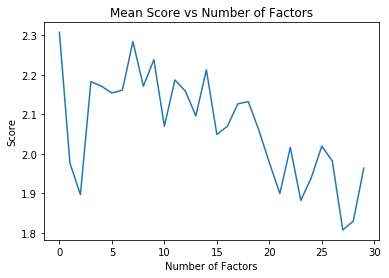

In [5]:
# Plot scores vs. num_factors

num_factors = range(30)
scores=[]

for i in num_factors:
    m = create_factorization_recommender(train_data, num_factors= i)
    df_predict['pred_rating'] = m.predict(val_data)
    rc= score(df_true, df_predict)
    scores.append(rc)
    print(num_factors,': ', i, 'Score: ', rc)

plt.plot(num_factors, scores)
plt.title('Mean Score vs Number of Factors')
plt.xlabel("Number of Factors")
plt.ylabel('Score')
plt.show()

Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.69851s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.045ms                        | 1.75       |

| 102.15ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 104.901ms                           | 0                | 0               |

| 1.04s                               | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.17829s

('Similarity Type: ', 'pearson', 'Score: ', 2.5477881493506493)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.59354s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 12.052ms                       | 1.75       |

| 101.335ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 104.064ms                           | 0                | 0               |

| 385.2ms                             | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.513874s

('Similarity Type: ', 'cosine', 'Score: ', 2.3813244047619047)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.64042s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 12.029ms                       | 3.75       |

| 86.372ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 89.426ms                            | 0                | 0               |

| 325.282ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.446565s

('Similarity Type: ', 'jaccard', 'Score: ', 1.5582386363636365)


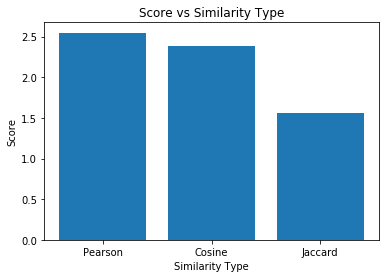

In [6]:
# Plot scores vs. tuned hyperparameters
similarity_type = ['pearson', 'cosine', 'jaccard']
scores=[]
for i in similarity_type:
    m = create_recommender(train_data, similarity_type=i)
    df_predict['pred_rating'] = m.predict(val_data)
    rc= score(df_true, df_predict)
    scores.append(rc)
    print('Similarity Type: ', i, 'Score: ', rc)
plt.bar(np.arange(3), scores)
plt.xticks(np.arange(3), ('Pearson', 'Cosine', 'Jaccard'))
plt.title('Score vs Similarity Type')
plt.xlabel('Similarity Type')
plt.ylabel('Score')
plt.show()

Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.56744s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 13.197ms                       | 1.75       |

| 96.193ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 98.999ms                            | 0                | 0               |

| 359.234ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.499757s

('Threshold: ', 0.00050000000000000001, 'Score: ', 1.5809320887445888)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.56674s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.456ms                        | 1.75       |

| 86.843ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 89.845ms                            | 0                | 0               |

| 353.45ms                            | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.499995s

('Threshold: ', 0.001, 'Score: ', 1.5417343073593073)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.60703s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.229ms                        | 1.75       |

| 89.535ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 92.459ms                            | 0                | 0               |

| 323.3ms                             | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.435241s

('Threshold: ', 0.0015, 'Score: ', 1.5375067640692641)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.56066s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.488ms                        | 1.75       |

| 88.988ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 92ms                                | 0                | 0               |

| 324.962ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.436465s

('Threshold: ', 0.002, 'Score: ', 1.5804924242424243)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.68655s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.83ms                         | 1.75       |

| 85.327ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 88.609ms                            | 0                | 0               |

| 330.518ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.46525s

('Threshold: ', 0.0025000000000000001, 'Score: ', 1.5732886904761905)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.56808s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.711ms                        | 1.75       |

| 88.231ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 91.209ms                            | 0                | 0               |

| 323.976ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.439783s

('Threshold: ', 0.0030000000000000001, 'Score: ', 1.5046672077922079)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.56566s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 9.342ms                        | 1.75       |

| 90.139ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 94.114ms                            | 0                | 0               |

| 324.927ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.436543s

('Threshold: ', 0.0035000000000000001, 'Score: ', 1.5031791125541125)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.54501s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.823ms                        | 1.75       |

| 127.545ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 131.956ms                           | 0                | 0               |

| 419.094ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.540697s

('Threshold: ', 0.0040000000000000001, 'Score: ', 1.5819466991341991)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.55804s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 11.648ms                       | 1.75       |

| 91.015ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 91.955ms                            | 0                | 0               |

| 324.737ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.455386s

('Threshold: ', 0.0045000000000000005, 'Score: ', 1.5215435606060606)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.69426s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 7.529ms                        | 1.75       |

| 103.164ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 105.948ms                           | 0                | 0               |

| 409.45ms                            | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.530269s

('Threshold: ', 0.005000000000000001, 'Score: ', 1.5039231601731602)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.55347s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 11.467ms                       | 1.75       |

| 90.681ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 93.513ms                            | 0                | 0               |

| 327.298ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.439374s

('Threshold: ', 0.0054999999999999997, 'Score: ', 1.5143060064935066)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.60749s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 17.443ms                       | 1.75       |

| 109.805ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 113.054ms                           | 0                | 0               |

| 414.394ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.548163s

('Threshold: ', 0.0060000000000000001, 'Score: ', 1.5318249458874458)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.63314s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.695ms                        | 1.75       |

| 89.4ms                         | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 92.216ms                            | 0                | 0               |

| 313.21ms                            | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.432051s

('Threshold: ', 0.0065000000000000006, 'Score: ', 1.5404153138528138)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.67531s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 9.364ms                        | 1.75       |

| 82.609ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 85.579ms                            | 0                | 0               |

| 314.772ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.452804s

('Threshold: ', 0.007000000000000001, 'Score: ', 1.5516774891774892)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.73888s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.783ms                        | 1.75       |

| 84.079ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 87.122ms                            | 0                | 0               |

| 364.924ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.496392s

('Threshold: ', 0.0074999999999999997, 'Score: ', 1.5322646103896105)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.57478s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.809ms                        | 1.75       |

| 85.321ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 88.398ms                            | 0                | 0               |

| 344.914ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.454916s

('Threshold: ', 0.0080000000000000002, 'Score: ', 1.5458603896103895)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.90509s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 6.265ms                        | 1.75       |

| 86.889ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 90.331ms                            | 0                | 0               |

| 324.345ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.447743s

('Threshold: ', 0.0085000000000000006, 'Score: ', 1.5233022186147187)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.5804s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.336ms                        | 1.75       |

| 90.403ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 93.258ms                            | 0                | 0               |

| 337.954ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.449423s

('Threshold: ', 0.0090000000000000011, 'Score: ', 1.4935741341991342)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.55426s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.925ms                        | 1.75       |

| 82.005ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 84.846ms                            | 0                | 0               |

| 323.071ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.439975s

('Threshold: ', 0.0095000000000000015, 'Score: ', 1.4962121212121211)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.52049s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.54ms                         | 1.75       |

| 95.515ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 98.885ms                            | 0                | 0               |

| 327.311ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.456817s

('Threshold: ', 0.01, 'Score: ', 1.5446428571428572)


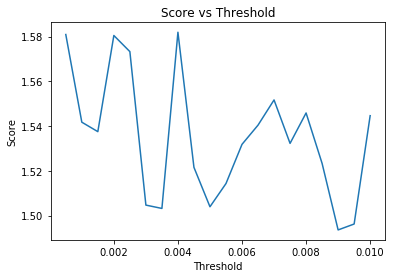

In [7]:
threshold = list(np.linspace(0.0005,.01,num=20))
scores=[]
for i in threshold:
    m = create_recommender(train_data, threshold=i)
    df_predict['pred_rating'] = m.predict(val_data)
    rc= score(df_true, df_predict)
    scores.append(rc)
    print('Threshold: ', i, 'Score: ', rc)
plt.plot(threshold, scores)
plt.title('Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.show()

Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.62724s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3ms                            | 1.75       |

| 90.201ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 94.58ms                             | 0                | 0               |

| 363.589ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.505557s

('Only Top K: ', 64.0, 'Score: ', 1.5437635281385282)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.59732s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.195ms                        | 1.75       |

| 79.124ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 82.426ms                            | 0                | 0               |

| 365.719ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.481527s

('Only Top K: ', 66.0, 'Score: ', 1.4872835497835497)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.58905s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 13.491ms                       | 3.75       |

| 87.906ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 91.241ms                            | 0                | 0               |

| 317.504ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.430403s

('Only Top K: ', 68.0, 'Score: ', 1.4749729437229437)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.51355s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 12.718ms                       | 1.75       |

| 83.399ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 86.146ms                            | 0                | 0               |

| 337.657ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.451052s

('Only Top K: ', 70.0, 'Score: ', 1.3775703463203464)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.5075s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 9.231ms                        | 1.75       |

| 88.357ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 91.713ms                            | 0                | 0               |

| 320.805ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.430458s

('Only Top K: ', 72.0, 'Score: ', 1.3509199134199135)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.54259s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.598ms                        | 1.75       |

| 83.954ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 87.062ms                            | 0                | 0               |

| 339.988ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.455412s

('Only Top K: ', 74.0, 'Score: ', 1.4587053571428572)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.53105s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.339ms                        | 1.75       |

| 82.952ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 85.99ms                             | 0                | 0               |

| 321.006ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.454431s

('Only Top K: ', 76.0, 'Score: ', 1.4016166125541125)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.81462s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 14.826ms                       | 1.75       |

| 99.466ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 102.967ms                           | 0                | 0               |

| 353.836ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.466417s

('Only Top K: ', 78.0, 'Score: ', 1.485457251082251)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.67964s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.654ms                        | 1.75       |

| 174.164ms                      | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 177.491ms                           | 0                | 0               |

| 438.258ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.557768s

('Only Top K: ', 80.0, 'Score: ', 1.4183915043290043)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.75256s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.366ms                        | 1.75       |

| 94.932ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 97.968ms                            | 0                | 0               |

| 339.02ms                            | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.455016s

('Only Top K: ', 82.0, 'Score: ', 1.3337053571428572)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.64273s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 14.003ms                       | 1.75       |

| 94.705ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 97.604ms                            | 0                | 0               |

| 340.454ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.466505s

('Only Top K: ', 84.0, 'Score: ', 1.2924107142857142)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.61156s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.613ms                        | 1.75       |

| 92.775ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 96.741ms                            | 0                | 0               |

| 328.417ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.446315s

('Only Top K: ', 86.0, 'Score: ', 1.3072916666666667)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.66741s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.451ms                        | 1.75       |

| 94.142ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 96.844ms                            | 0                | 0               |

| 341.063ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.479774s

('Only Top K: ', 88.0, 'Score: ', 1.2302827380952381)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.74608s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.179ms                        | 1.75       |

| 98.073ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 102.476ms                           | 0                | 0               |

| 359.948ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.484832s

('Only Top K: ', 90.0, 'Score: ', 1.3734442640692641)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.61077s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 9.688ms                        | 1.75       |

| 83.521ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 86.773ms                            | 0                | 0               |

| 312.763ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.424437s

('Only Top K: ', 92.0, 'Score: ', 1.4826163419913421)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.53509s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 2.64ms                         | 1.75       |

| 88.266ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 91.098ms                            | 0                | 0               |

| 324.441ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.464813s

('Only Top K: ', 94.0, 'Score: ', 1.3811891233766234)


Recsys training: model = item_similarity

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 1.61183s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 6.07ms                         | 1.75       |

| 86.986ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 90.227ms                            | 0                | 0               |

| 321.721ms                           | 100              | 141             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.443643s

('Only Top K: ', 96.0, 'Score: ', 1.3440882034632036)


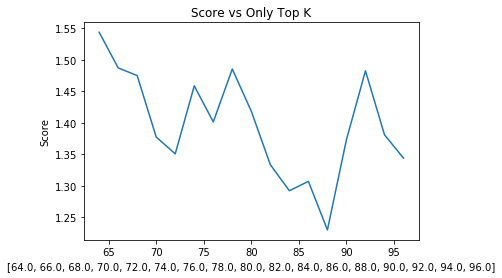

In [8]:
only_top_k = list(np.linspace(64,96,num=17))
scores=[]
for i in only_top_k:
    m = create_recommender(train_data, only_top_k=i)
    df_predict['pred_rating'] = m.predict(val_data)
    rc= score(df_true, df_predict)
    scores.append(rc)
    print('Only Top K: ', i, 'Score: ', rc)
plt.plot(only_top_k, scores)
plt.title('Score vs Only Top K')
plt.xlabel(only_top_k)
plt.ylabel('Score')
plt.show()